In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_excel(r"C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\dataset\Well-6.xlsx")

In [5]:
df.columns

Index(['Unnamed: 0', 'level_0', 'index', 'TVA (m3)', 'SPPA (kPa)',
       'MFOA (m3/s)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)', 'STATUS',
       'Unnamed: 41', 'variation_TVA (m3)', 'variation_SPPA (kPa)',
       'variation_MFOP ((m3/s)/(m3/s))', 'variation_MFOA (m3/s)',
       'variation_GASA (mol/mol)'],
      dtype='object')

In [6]:
cols_var=['variation_TVA (m3)', 'variation_SPPA (kPa)',
       'variation_MFOP ((m3/s)/(m3/s))', 'variation_MFOA (m3/s)',
       'variation_GASA (mol/mol)']
cols_=['TVA (m3)', 'SPPA (kPa)',
       'MFOA (m3/s)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']

In [7]:
data=df[df['STATUS']==1]

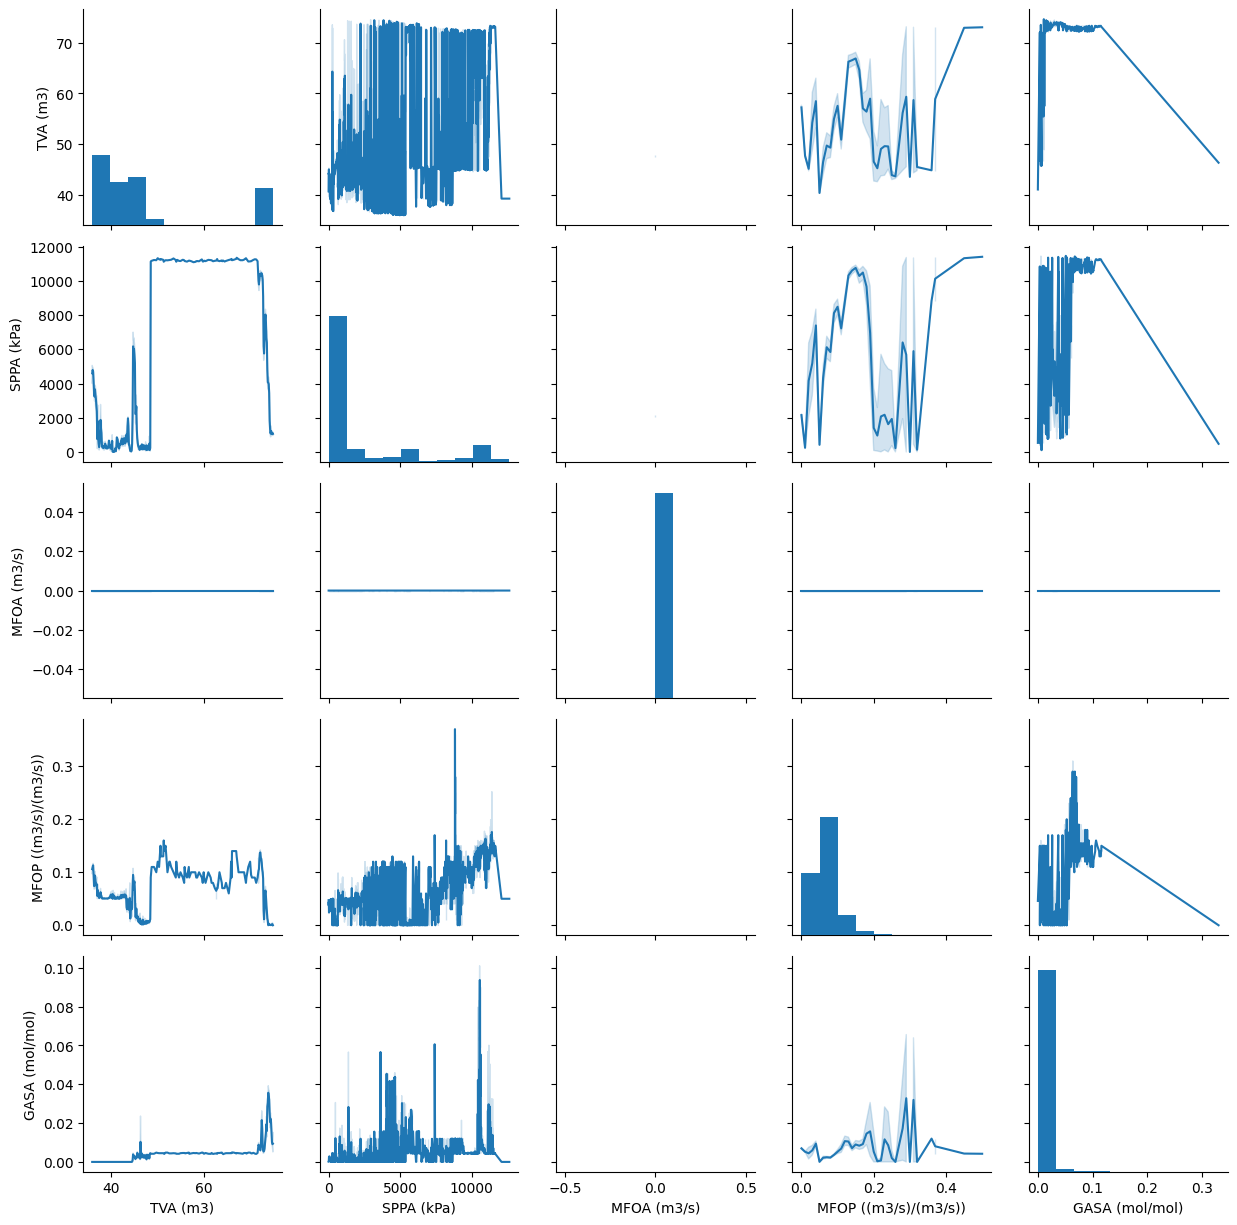

In [15]:
g = sns.PairGrid(df[cols_])

# Set the diagonal to a histogram
g.map_diag(plt.hist)

# Set the upper triangle to a line plot
g.map_upper(sns.lineplot)

# Set the lower triangle to a scatter plot
g.map_lower(sns.lineplot)

# Show plot
plt.show()

In [49]:
cols=[ 'SPM1 (1/s)', 
        'TVA (m3)',   'MFOP ((m3/s)/(m3/s))', 
  'MFIA (m3/s)', 
         'BPOS (m)', 
        
        'STKC',  
        'GASA (mol/mol)',  'SPPA (kPa)',
        ]

In [47]:
data=df[df['STATUS']==1]

In [44]:
data.shape

(121, 47)

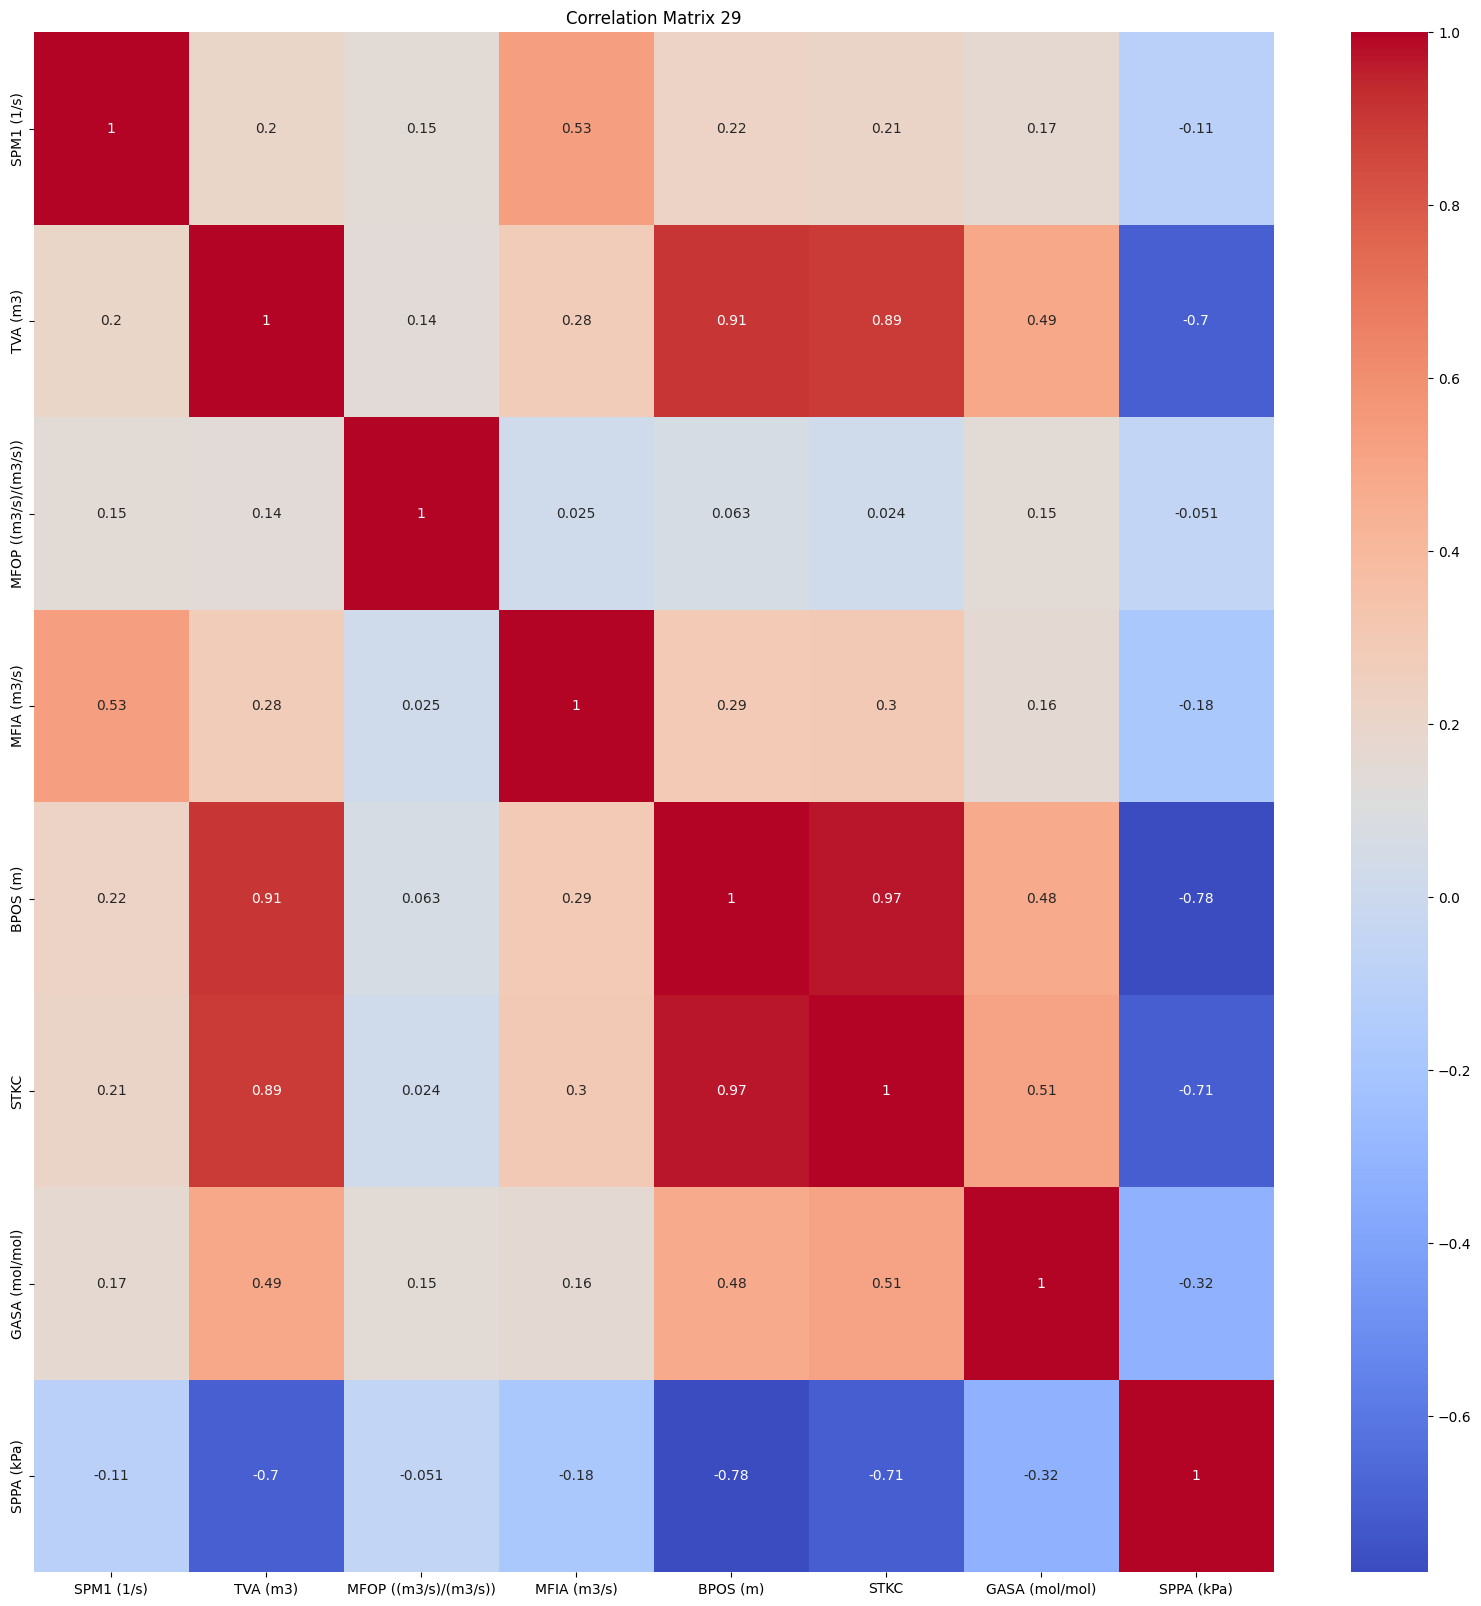

In [52]:
corr = data[cols].corr()


plt.figure(figsize=(20, 20))  # set figure size
sns.heatmap(corr, cmap='coolwarm', annot=True)  # create heatmap with annotations
plt.title('Correlation Matrix 29')  # add title
plt.show() 

In [ ]:
def feature_rep(window,tva_thresh,mfop_thresh,mfoa_thresh,spp_thresh,gas_thresh):
    gasa,mfoa,spp,mfop,tva=False,False,False,False,False
    if window['variation_GASA (mol/mol)'].sum()>=gas_thresh:
        gasa=True
    if window['variation_TVA (m3)'].sum()>=tva_thresh:
        tva=True
    if window['variation_SPPA (kPa)'].sum()>=spp_thresh:
        spp=True
    if window['variation_MFOA (m3/s)'].sum()<=mfoa_thresh:
        mfoa=True
    if window['variation_MFOP ((m3/s)/(m3/s))'].sum()<mfop_thresh:
        mfop= True
        
    
    return [gasa,mfoa,mfop,spp,tva]

def kick_detection(featurs):
    return all(featurs)

In [ ]:
window_size = 120
window_size = int(window_size // 5)# convert time to rows
windows = df.groupby((df.index // window_size) + 1)


In [ ]:
result=[]
all_result=[]
tva_thresh,mfop_thresh,mfoa_thresh,spp_thresh,spp_thresh,=0,0,0,0,0

for i, batch in windows:
    # print(f'--------window number {i}--------')
    # print(batch.head(5))
    featurs=feature_rep(batch,tva_thresh,mfop_thresh,mfoa_thresh,spp_thresh,gas_thresh=0.05)
    cla=kick_detection(featurs)
    # batch['kick']=cla
    # result.append(cla)
    # print(f'--------window number {i}--------')
    # print(batch['kick'].head(24))
    # all_result.append(batch['kick'].astype(int))

KeyError: 'variation_GASA (mol/mol)'

In [ ]:
d={'A':[1,1,1,0,1,0],'B':[1,1,1,1,1,1]}
d=pd.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def sig_var(df,target):
#    df = df.reset_index()
   df['variation_'+target] = 0
   for index, row in df.iterrows():
       if index == 0:
           prev_row = row
           df['variation_'+target][index] = df[target][index]
           continue
       df['variation_'+target][index] = row[target] - prev_row[target]
       prev_row = row
   return df




In [ ]:
df=pd.read_excel(r"C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\data\All_data.xlsx")
data=sig_var(df,'TVA (m3)')
data=sig_var(data,'SPPA (kPa)')
data=sig_var(data,'MFOP ((m3/s)/(m3/s))')
data=sig_var(data,'MFOA (m3/s)')

data=sig_var(data,'GASA (mol/mol)')

data.to_excel(r"C:\Users\hp\Desktop\M2\PFE\Code\code pfe\Coud source\Code\dataset\all.xlsx",index='ignore')

C:\Users\hp\AppData\Local\Temp\ipykernel_7460\2671294873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variation_'+target][index] = df[target][index]
C:\Users\hp\AppData\Local\Temp\ipykernel_7460\2671294873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variation_'+target][index] = df[target][index]
C:\Users\hp\AppData\Local\Temp\ipykernel_7460\2671294873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['var